<a href="https://colab.research.google.com/github/zolzayakh/Dive-into-coding/blob/main/Logistic_Regression_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Problem 1] Logistic Regression in scratch**

In [ ]:
import numpy as np

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose, lam):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter)
        self.lam = lam

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.bias == True:
          bias = np.ones((X.shape[0], 1))
          X = np.hstack((bias, X))
          if X_val is not None:
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.num_iter):
          pred = self._logistic_hypothesis(X)
          self._gradient_descent(X, y)
          loss = self._loss_func(pred, y)
          self.loss[i] = loss
          if X_val is not None:
            pred_val = self._logistic_hypothesis(X_val)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss[i] = loss_val
          if self.verbose == True:
            print('{}回目の学習の損失は{}'.format(i,loss))

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias == True:
          a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
          X = np.hstack([a, X])
        return  np.where(self._logistic_hypothesis(X) >= 0.5,1,0)

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias == True:
          a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
          X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred

    def _gradient_descent(self, X, y):
        """Θ更新（最急降下法）"""
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
          gradient = 0
          for i in range(m):
            gradient += (pred[i] - y[i]) * X[i, j]
          self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)
     
    def _sigmoid(self,y):
        """sigmoid関数"""
        return 1 / (1 + np.exp(-y))
        
    def _logistic_hypothesis(self, X):
        """仮定関数"""
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred
    
    def _loss_func(self, pred, y):
        """クロスエントロピー誤差関数"""
        error = 0
        for i in range(y.shape[0]):
          error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
        return loss

**[Problem 5] Learning and estimation**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

prediction_slr = slr.predict(X_test)
print (prediction_slr.tolist())

[[0], [0], [0], [0], [1], [0], [1], [0], [0], [1], [0], [1], [1], [1], [1], [1], [1], [0], [0], [1]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#calculate evaluation metrics and add to evaluation_table
def calculate_metrics_add_to_table(prediction_result, model_name, table_name, y_test):
  d = {'accuracy':[accuracy_score(y_test, prediction_result)], 'precision':[precision_score(y_test, prediction_result, average='macro')], 'recall':[recall_score(y_test, prediction_result, average='macro')], 'F1 score': [f1_score(y_test, prediction_result, average='macro')]}
  evaluation_result = pd.DataFrame(data=d, index=[model_name])
  return table_name.append(evaluation_result)

# LR of scikit-learn 
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression().fit(X_train, y_train)
prediction_LR = model_logistic.predict(X_test)




# Logistic regression in scratch
model_scratch = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False, lam=0.1)
model_scratch.fit(X_train, y_train)
# LR in scratch
model_scratch = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False, lam=0.1)
model_scratch.fit(X_train, y_train)

prediction_scratch = model_scratch.predict(X_test)
print("-----LR of scikit-learn-------")
print("Accuracy:", accuracy_score(prediction_LR, y_test))
print("Prediction:", precision_score(prediction_LR, y_test))
print("Recall:",recall_score(prediction_LR, y_test))
print("F1_score:", f1_score(prediction_LR, y_test))
print("\n-----LR of scratch-------")
print("Accuracy:", accuracy_score(prediction_scratch, y_test))
print("Prediction:", precision_score(prediction_scratch, y_test))
print("Recall:",recall_score(prediction_scratch, y_test))
print("F1_score:", f1_score(prediction_scratch, y_test))



-----LR of scikit-learn-------
Accuracy: 1.0
Prediction: 1.0
Recall: 1.0
F1_score: 1.0

-----LR of scratch-------
Accuracy: 1.0
Prediction: 1.0
Recall: 1.0
F1_score: 1.0


**[Problem 6] Plot of learning curve**

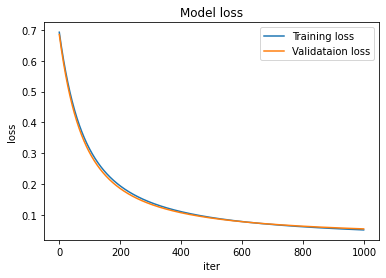

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss, label = 'Training loss')
plt.plot(slr.val_loss, label = 'Validataion loss')
plt.legend()
plt.xlabel ('iter')
plt.ylabel ('loss')
plt.title ('Model loss')
plt.show()

**[Problem 7] Visualization of decision area**

In [ ]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=2000, lr=0.001,bias=True,verbose=False,lam = 0.1)
slr.fit(X_train, y_train,X_test,y_test)

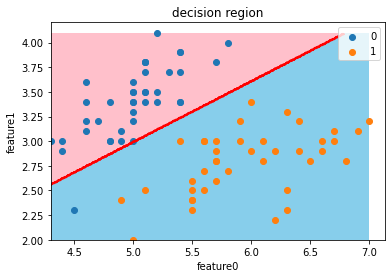

In [ ]:
from matplotlib.colors import ListedColormap

def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

decision_region(X_train, y_train, slr)

**[Problem 8] (Advance task) Saving weights**

In [ ]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(slr, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict_proba(X_test)
print(result)

[[0.47998726]
 [0.4425704 ]
 [0.47535377]
 [0.46081429]
 [0.54112334]
 [0.41122682]
 [0.58936083]
 [0.47684687]
 [0.48297619]
 [0.5683364 ]
 [0.40385226]
 [0.58565988]
 [0.54573107]
 [0.58711173]
 [0.63656087]
 [0.59240313]
 [0.5759631 ]
 [0.43357839]
 [0.4471567 ]
 [0.57742441]]
